In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

In [ ]:
data=pd.read_csv("/content/Crop_recommendation (1).csv")
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
data.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [ ]:
data.tail(10)

,N,P,K,temperature,humidity,ph,rainfall,label
2190,103,40,30,27.309018,55.196224,6.348316,141.483164,coffee
2191,118,31,34,27.548230,62.881792,6.123796,181.417081,coffee
2192,106,21,35,25.627355,57.041511,7.428524,188.550654,coffee
2193,116,38,34,23.292503,50.045570,6.020947,183.468585,coffee
2194,97,35,26,24.914610,53.741447,6.334610,166.254931,coffee
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [ ]:
data.shape

(2200, 8)

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
data.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [ ]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


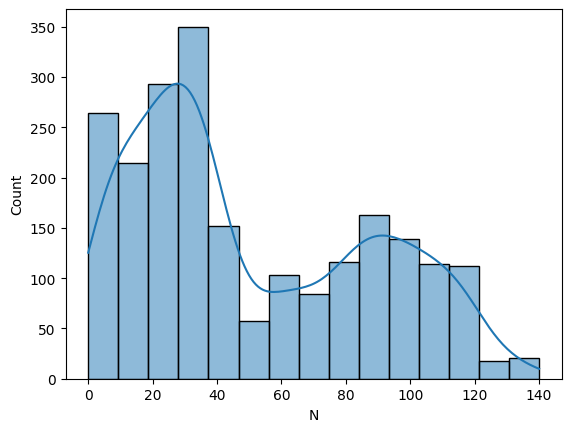

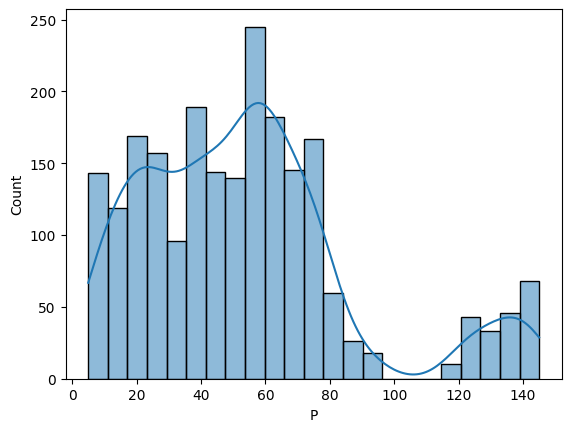

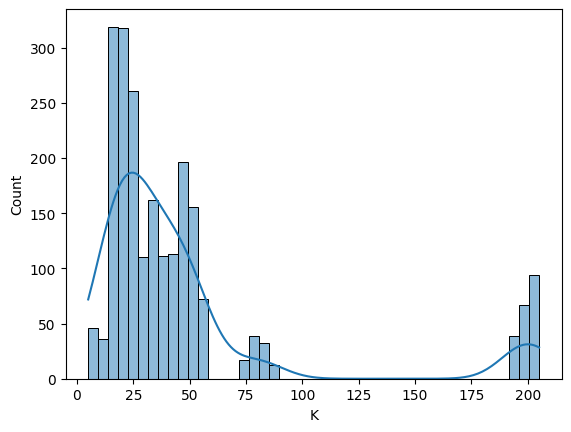

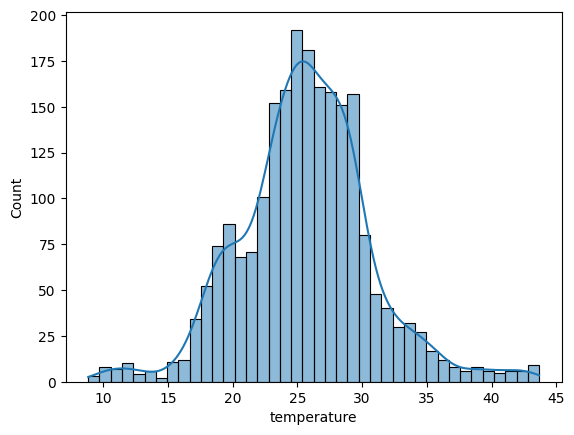

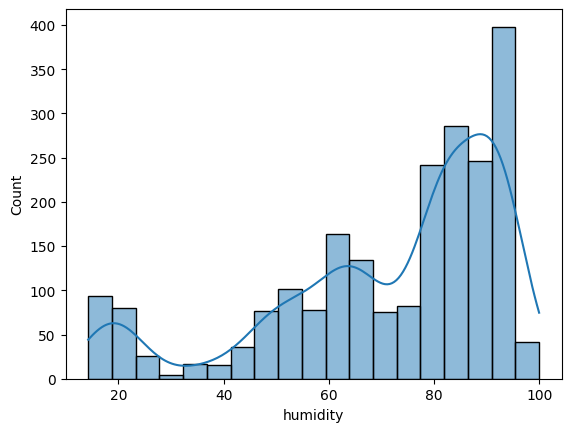

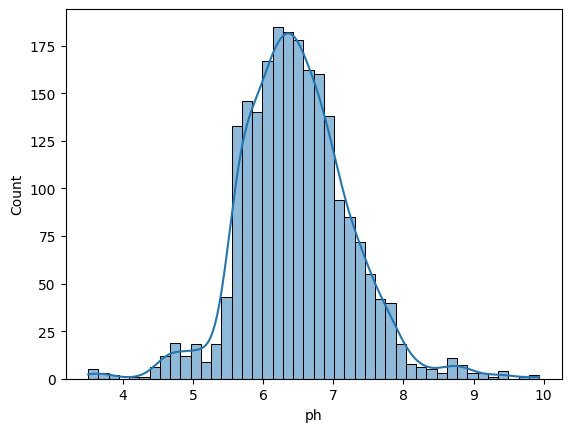

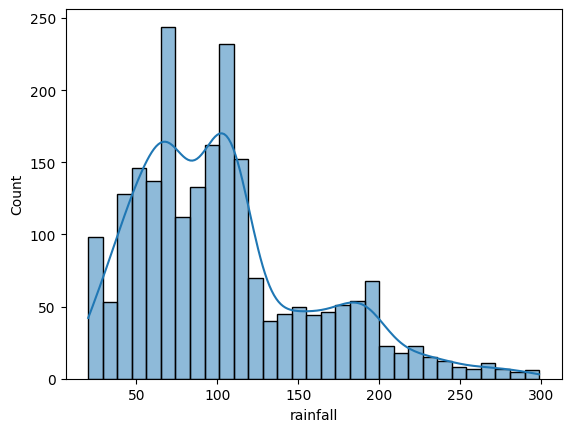

In [ ]:
for num, i in enumerate(data.drop(columns='label', axis=1).columns):
    sns.histplot(data[i], kde=True)
    plt.show()

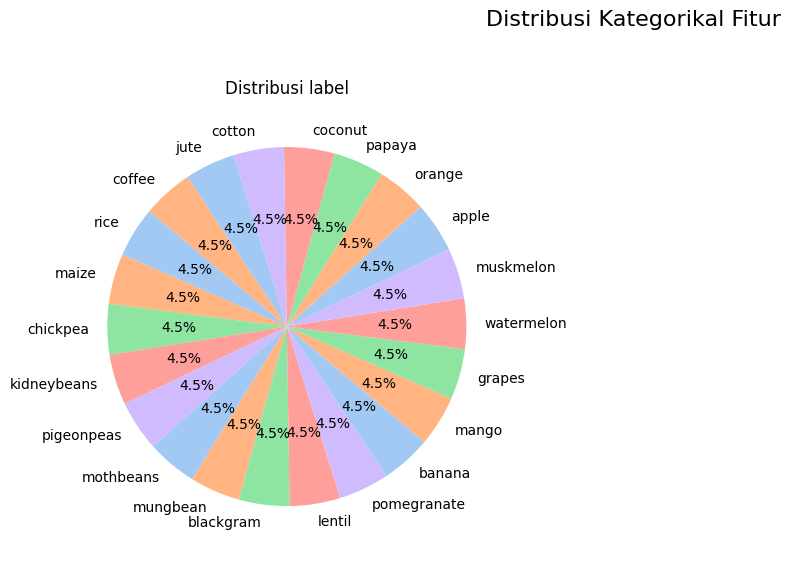

In [ ]:
colors = sns.color_palette('pastel')[0:5]

plt.figure(figsize=(14, 10))

for i, feature in enumerate(['label'], 1):
    plt.subplot(2, 2, i)
    counts = data[feature].value_counts()

    plt.pie(
        counts,
        labels=counts.index,
        colors=colors,
        autopct='%1.1f%%',
        startangle=140
    )

    plt.title(f'Distribusi {feature}', fontsize=12)

plt.suptitle('Distribusi Kategorikal Fitur', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [ ]:
def feature_engineer(data):
    data['NPK'] =  (data['N'] +  data['P'] +  data['K']) / 3
    data['THI'] = data['temperature'] *  data['humidity'] / 100
    data['rainfall_level'] = pd.cut( data['rainfall'],
                              bins=[0, 50, 100, 200, 300],
                              labels=['Low', 'Medium', 'High', 'Very High'])
    def ph_category(p):
        if p < 5.5:
            return 'Acidic'
        elif p <= 7.5:
            return 'Neutral'
        else:
            return 'Alkaline'

    data['ph_category'] =  data['ph'].apply(ph_category)
    data['temp_rain_interaction'] =  data['temperature'] *  data['rainfall']
    data['ph_rain_interaction'] = data['ph'] *  data['rainfall']

    return data

In [ ]:
df_fe = feature_engineer(data)
df_fe.head()

,N,P,K,temperature,humidity,ph,rainfall,label,NPK,THI,rainfall_level,ph_category,temp_rain_interaction,ph_rain_interaction
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,58.333333,17.121963,Very High,Neutral,4237.241986,1319.686807
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,61.333333,17.485957,Very High,Neutral,4934.395694,1595.223513
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,53.000000,18.937446,Very High,Alkaline,6072.354751,2069.534380
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,49.666667,21.234829,Very High,Neutral,6433.734530,1695.288324
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,54.000000,16.427204,Very High,Alkaline,5288.545993,2004.132110


In [ ]:
ph_order = CategoricalDtype(categories=["Acidic", "Neutral", "Alkaline"], ordered=True)

df_fe["ph_category"] = df_fe["ph_category"].astype(ph_order)

In [ ]:
X = df_fe.drop(columns='label', axis=1)
y = df_fe['label']
le_target = LabelEncoder()
y_enc = le_target.fit_transform(y)

X_train, X_val, y_train, y_val = train_test_split(X, y_enc, train_size=0.8, test_size=0.2, random_state=42, stratify=y_enc)

In [ ]:
num_cols = X.select_dtypes(include='number').columns
cat_cols = X.select_dtypes(include='category').columns

In [ ]:
preprocess = ColumnTransformer([
    ('num', MinMaxScaler(), num_cols),
    ('cat', OrdinalEncoder(), cat_cols)
])

In [ ]:
pipe = Pipeline([
    ('preprocess', preprocess),
    ('model', XGBClassifier(random_state=42))
])

In [ ]:
fold = StratifiedKFold(n_splits=5, shuffle=True)
score = cross_val_score(pipe, X_train, y_train, cv=fold, scoring='accuracy')
for i, score in enumerate(score):
    print(f'fold {i + 1}: {(score * 100).round(2)}%')

fold 1: 97.44%
fold 2: 98.58%
fold 3: 99.15%
fold 4: 99.72%
fold 5: 98.86%


In [ ]:
importances = pipe.named_steps['model'].feature_importances_
feature_names = X_train.columns

feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

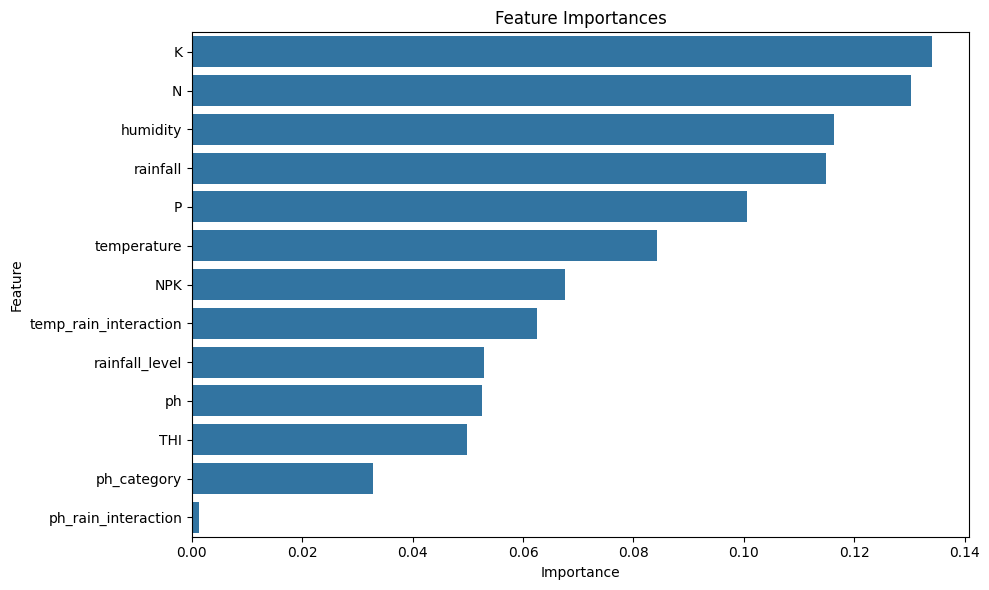

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

In [ ]:
y_pred_inverse = le_target.inverse_transform(y_pred)
y_val_inverse = le_target.inverse_transform(y_val)
df_true = pd.DataFrame(y_val_inverse, columns=['TrueValue'])
df_pred = pd.DataFrame(y_pred_inverse, columns=['PredictedValue'])

In [ ]:
compared_df = pd.concat([df_true, df_pred], axis=1)

In [ ]:
compared_df.head(50)

,TrueValue,PredictedValue
0,orange,orange
1,banana,banana
2,cotton,cotton
3,maize,maize
4,orange,orange
5,chickpea,chickpea
6,rice,rice
7,blackgram,blackgram
8,banana,banana
9,orange,orange
